<img src='logo/dsl-logo.png' width="500" align="center" />

# HR Competition

## Nearest Neighbor Model

### Initializations

In [1]:
# Bibliotheken einbinden
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve
%matplotlib inline

In [2]:
# Definition einer Klasse für Text Styles
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
X = np.load(file='exchange/hr_06_X.npy')
X_train = np.load(file='exchange/hr_06_X_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_test_scaled.npy')
y = np.load(file='exchange/hr_06_y.npy')
y_train = np.load(file='exchange/hr_06_y_train.npy')
y_test = np.load(file='exchange/hr_06_y_test.npy')

In [4]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### Use Nearest Neighbor

In [5]:
knn = KNeighborsClassifier()

In [6]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [7]:
knn.score(X_test_scaled, y_test)

0.93049999999999999

In [8]:
predictions = knn.predict(X_test_scaled)

In [9]:
print("Train Accuracy :: ", accuracy_score(y_train, knn.predict(X_train_scaled)))
print("Test Accuracy  :: ", accuracy_score(y_test, predictions))

Train Accuracy ::  0.953125
Test Accuracy  ::  0.9305


In [10]:
print(confusion_matrix(y_test, predictions))

[[1461   75]
 [  64  400]]


In [11]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.96      0.95      0.95      1536
          1       0.84      0.86      0.85       464

avg / total       0.93      0.93      0.93      2000



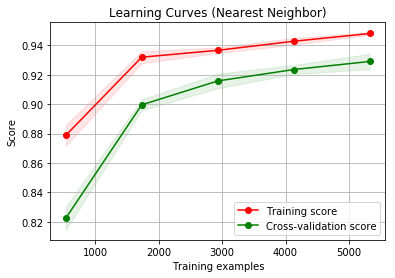

In [12]:
title = 'Learning Curves (Nearest Neighbor)'
estimator = knn
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

### Use Nearest Neighbor w/o Department

In [13]:
X = np.load(file='exchange/hr_06_X_wodept.npy')
X_train = np.load(file='exchange/hr_06_X_wodept_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_wodept_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_wodept_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_wodept_test_scaled.npy')
y = np.load(file='exchange/hr_06_y_wodept.npy')
y_train = np.load(file='exchange/hr_06_y_wodept_train.npy')
y_test = np.load(file='exchange/hr_06_y_wodept_test.npy')

In [14]:
knn = KNeighborsClassifier()

In [15]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [16]:
knn.score(X_test_scaled, y_test)

0.95550000000000002

In [17]:
predictions = knn.predict(X_test_scaled)

In [18]:
print("Train Accuracy :: ", accuracy_score(y_train, knn.predict(X_train_scaled)))
print("Test Accuracy  :: ", accuracy_score(y_test, predictions))

Train Accuracy ::  0.969625
Test Accuracy  ::  0.9555


In [19]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[1496   40]
 [  49  415]]


In [20]:
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1525,   11],
       [  24,  440]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1510,   26],
       [  25,  439]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1471,   65],
       [ 108,  356]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1831,   16],
       [  20,  533]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]]), 'label': 'Gradient Boost'}}


In [21]:
cm_dict.item().update({'nearest_neighbor':{'cm': cm, 'label': 'Nearest Neighbor' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1525,   11],
       [  24,  440]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1510,   26],
       [  25,  439]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1471,   65],
       [ 108,  356]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1496,   40],
       [  49,  415]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]]), 'label': 'Gradient Boost'}}


In [22]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.97      0.97      0.97      1536
          1       0.91      0.89      0.90       464

avg / total       0.96      0.96      0.96      2000



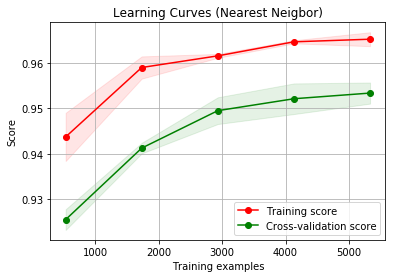

In [23]:
title = 'Learning Curves (Nearest Neigbor)'
estimator = knn
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

### Hyperparameter Tuning Using GridSearchCV

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
X = np.load(file='exchange/hr_06_X_wodept.npy')
X_train = np.load(file='exchange/hr_06_X_wodept_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_wodept_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_wodept_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_wodept_test_scaled.npy')
y = np.load(file='exchange/hr_06_y_wodept.npy')
y_train = np.load(file='exchange/hr_06_y_wodept_train.npy')
y_test = np.load(file='exchange/hr_06_y_wodept_test.npy')

In [26]:
knn = KNeighborsClassifier()

In [27]:
param_space = {'n_neighbors':[1,2,3,5,8,13,21], 'weights':['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size':[15,30,60], 'p':[1,2,3]}

In [30]:
gs = GridSearchCV(knn, param_space, cv=5, n_jobs=-1)

In [ ]:
gs.fit(X_train_scaled, y_train)

In [ ]:
scores = pd.DataFrame(gs.grid_scores_)
plt.hist(scores['mean_validation_score'], bins=10)
plt.title('Histogram of Mean Score Distribution');

In [ ]:
gs.best_score_

In [ ]:
gs.best_params_

In [ ]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=15, n_neighbors=8, p=1, weights='distance')

In [143]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=15, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=1,
           weights='distance')

In [144]:
knn.score(X_test_scaled, y_test)

0.9770833333333333

In [145]:
predictions = knn.predict(X_test_scaled)

In [146]:
print("Train Accuracy :: ", accuracy_score(y_train, knn.predict(X_train_scaled)))
print("Test Accuracy  :: ", accuracy_score(y_test, predictions))

Train Accuracy ::  1.0
Test Accuracy  ::  0.977083333333


In [147]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[1814   33]
 [  22  531]]


In [ ]:
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

In [ ]:
cm_dict.item().update({'nearest_neighbor':{'cm': cm, 'label': 'Nearest Neighbor' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
title = 'Learning Curves (Nearest Neighbor)'
estimator = knn
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

### Feature Selection for Nearest Neighbor

In [106]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from IPython.display import clear_output
import itertools as it

In [107]:
# Definition einer Klasse für Text Styles
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [108]:
dff = pd.read_pickle('exchange/hr_01_cleaned_train.pkl')
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 10 columns):
satisfactionLevel       11999 non-null float64
yearsSinceEvaluation    11999 non-null float64
numberOfProjects        11999 non-null int64
averageMonthlyHours     11999 non-null int64
yearsAtCompany          11999 non-null int64
workAccident            11999 non-null category
hasLeftCompany          11999 non-null category
gotPromotion            11999 non-null category
department              11999 non-null category
salary                  11999 non-null category
dtypes: category(5), float64(2), int64(3)
memory usage: 527.5 KB


In [109]:
# Datentyp von Category in Object umwandeln
for col in dff.select_dtypes(['category']):
    print('transforming', col)
    dff[col] = dff[col].astype('str')

transforming workAccident
transforming hasLeftCompany
transforming gotPromotion
transforming department
transforming salary


In [110]:
columns = list(dff.columns)
columns.remove('hasLeftCompany')
columns

['satisfactionLevel',
 'yearsSinceEvaluation',
 'numberOfProjects',
 'averageMonthlyHours',
 'yearsAtCompany',
 'workAccident',
 'gotPromotion',
 'department',
 'salary']

In [111]:
len(columns)

9

In [112]:
for i in range(0,4):
    print(len(set(it.combinations(columns,i))))

1
9
36
84


In [124]:
results = pd.DataFrame([], columns=['combination', 'score'])
for i in range(0,4):
    combinations = set(it.combinations(columns,i))
    for idx, comb in enumerate(combinations):
        print()
        print('calculating... combinations with ' + str(i) + ' elements :: ' + str(idx + 1) + ' of ' + str(len(combinations)))
        comb = list(comb)
        comb.append('hasLeftCompany')
        df = pd.get_dummies(dff.drop(comb, axis=1)).join(dff[['hasLeftCompany']])
        y = df['hasLeftCompany'].values
        X = df.drop(['hasLeftCompany'], axis=1).values
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        knn = KNeighborsClassifier(algorithm='auto', leaf_size=15, n_neighbors=8, p=1, weights='distance')
        scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, n_jobs=-1)
        results = results.append(pd.DataFrame([[','.join(comb), scores.mean()]], columns=results.columns))
        clear_output()
        print(color.BOLD + 'best scores so far:' + color.END)
        print(results.sort_values('score', ascending=False).head(5))

best scores so far:
                                         combination     score
0      workAccident,department,salary,hasLeftCompany  0.976976
0  averageMonthlyHours,department,salary,hasLeftC...  0.976143
0      gotPromotion,department,salary,hasLeftCompany  0.975727
0  yearsSinceEvaluation,department,salary,hasLeft...  0.974685
0                   department,salary,hasLeftCompany  0.974268


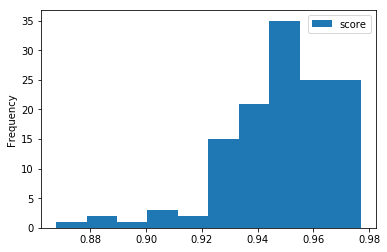

In [125]:
results.plot.hist();

In [126]:
results.sort_values('score', ascending=False).head(10)

,combination,score
0,"workAccident,department,salary,hasLeftCompany",0.976976
0,"averageMonthlyHours,department,salary,hasLeftC...",0.976143
0,"gotPromotion,department,salary,hasLeftCompany",0.975727
0,"yearsSinceEvaluation,department,salary,hasLeft...",0.974685
0,"department,salary,hasLeftCompany",0.974268
0,"workAccident,gotPromotion,department,hasLeftCo...",0.973121
0,"averageMonthlyHours,workAccident,department,ha...",0.972392
0,"yearsSinceEvaluation,workAccident,department,h...",0.972080
0,"workAccident,department,hasLeftCompany",0.971976
0,"gotPromotion,department,hasLeftCompany",0.971767


In [127]:
results.sort_values('score', ascending=False).tail(10)

,combination,score
0,"satisfactionLevel,numberOfProjects,workAcciden...",0.926242
0,"numberOfProjects,averageMonthlyHours,yearsAtCo...",0.913323
0,"yearsSinceEvaluation,numberOfProjects,yearsAtC...",0.912490
0,"satisfactionLevel,yearsSinceEvaluation,average...",0.907074
0,"satisfactionLevel,yearsSinceEvaluation,yearsAt...",0.905197
0,"yearsSinceEvaluation,averageMonthlyHours,years...",0.902594
0,"satisfactionLevel,averageMonthlyHours,yearsAtC...",0.891341
0,"satisfactionLevel,numberOfProjects,yearsAtComp...",0.885718
0,"satisfactionLevel,yearsSinceEvaluation,numberO...",0.878739
0,"satisfactionLevel,numberOfProjects,averageMont...",0.867694


In [128]:
df = pd.get_dummies(dff.drop(['workAccident','salary','department','hasLeftCompany'], axis=1)).join(dff[['hasLeftCompany']])
y = df['hasLeftCompany'].values
X = df.drop(['hasLeftCompany'], axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [129]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=15, n_neighbors=8, p=1, weights='distance')

In [130]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=15, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=1,
           weights='distance')

In [131]:
knn.score(X_test_scaled, y_test)

0.98499999999999999

In [132]:
predictions = knn.predict(X_test_scaled)

In [134]:
print("Train Accuracy :: ", accuracy_score(y_train, knn.predict(X_train_scaled)))
print("Test Accuracy  :: ", accuracy_score(y_test, predictions))

Train Accuracy ::  0.999791644963
Test Accuracy  ::  0.985


In [135]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[1831   16]
 [  20  533]]


In [136]:
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1841,    6],
       [  40,  513]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1738,  109],
       [ 352,  201]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1820,   27],
       [  18,  535]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1790,   57],
       [ 182,  371]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1814,   33],
       [  22,  531]]), 'label': 'Nearest Neighbor'}}


In [137]:
cm_dict.item().update({'nearest_neighbor':{'cm': cm, 'label': 'Nearest Neighbor' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1841,    6],
       [  40,  513]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1738,  109],
       [ 352,  201]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1820,   27],
       [  18,  535]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1790,   57],
       [ 182,  371]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1831,   16],
       [  20,  533]]), 'label': 'Nearest Neighbor'}}


In [138]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1847
          1       0.97      0.96      0.97       553

avg / total       0.98      0.98      0.98      2400



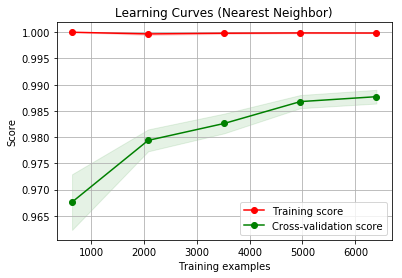

In [139]:
title = 'Learning Curves (Nearest Neighbor)'
estimator = clf
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()